In [2]:
%load_ext catalyst

In [3]:
%matplotlib inline

Running in backtesting mode.


[2018-01-12 00:55:46.440000] INFO: run_algo: running algo in paper-trading mode
[2018-01-12 00:55:46.670000] WARNING: Loader: Refusing to download new treasury data because a download succeeded at 2018-01-07 23:12:41.572527+00:00.
[2018-01-12 00:55:46.680000] INFO: exchange_algorithm: initialized trading algorithm in backtest mode
[2018-01-12 00:57:57.551000] INFO: Performance: Simulated 5 trading days out of 5.
[2018-01-12 00:57:57.559000] INFO: Performance: first open: 2017-10-19 00:00:00+00:00
[2018-01-12 00:57:57.564000] INFO: Performance: last close: 2017-10-23 23:59:00+00:00


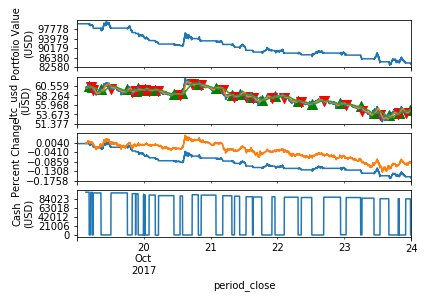

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_base,capital_used,cash,ending_cash,...,short_mavg,short_value,shorts_count,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
period_close,,,,,,,,,,,,,,,,,,,,,
2017-10-19 00:01:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,0,[],NaN
2017-10-19 00:02:00+00:00,0.000000,0.000000,0.000000,2.393868e-02,2.687110e-01,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:03:00+00:00,0.000000,0.000000,0.000000,4.845042e-02,5.438546e-01,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:04:00+00:00,0.000000,0.000000,0.000000,7.354894e-02,8.255848e-01,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:05:00+00:00,0.000000,0.000000,0.000000,9.924829e-02,1.114059e+00,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:06:00+00:00,0.000000,0.000000,0.000000,1.255628e-01,1.409439e+00,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:07:00+00:00,0.000000,0.000000,0.000000,1.525073e-01,1.711891e+00,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:08:00+00:00,0.000000,0.000000,0.000000,1.800968e-01,2.021582e+00,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221
2017-10-19 00:09:00+00:00,0.000000,0.000000,0.000000,2.083468e-01,2.338687e+00,0.000000e+00,100000.0,0.000000,NaN,100000.000000,...,NaN,0,0,NaN,100000.0,0.0,0.0,1,[],0.0221


In [5]:
%%catalyst --start 2017-10-19 --end 2017-10-23 --capital-base 100000 -x bitfinex -c usd --data-frequency minute


import numpy as np
import pandas as pd
from logbook import Logger
import matplotlib.pyplot as plt

from catalyst import run_algorithm
from catalyst.api import (order, record, symbol, order_target_percent,
        get_open_orders)
from catalyst.exchange.utils.stats_utils import extract_transactions


def initialize(context):
    context.i = 0
    context.asset = symbol('ltc_usd')
    context.base_price = None


def handle_data(context, data):
    # define the windows for the moving averages
    short_window = 50
    long_window = 200

    # Skip as many bars as long_window to properly compute the average
    context.i += 1
    if context.i < long_window:
        return

    # Compute moving averages calling data.history() for each
    # moving average with the appropriate parameters. We choose to use
    # minute bars for this simulation -> freq="1m"
    # Returns a pandas dataframe.
    short_mavg = data.history(context.asset, 'price',
                        bar_count=short_window, frequency="1m").mean()
    long_mavg = data.history(context.asset, 'price',
                        bar_count=long_window, frequency="1m").mean()

    # Let's keep the price of our asset in a more handy variable
    price = data.current(context.asset, 'price')

    # If base_price is not set, we use the current value. This is the
    # price at the first bar which we reference to calculate price_change.
    if context.base_price is None:
        context.base_price = price
    price_change = (price - context.base_price) / context.base_price

    # Save values for later inspection
    record(price=price,
           cash=context.portfolio.cash,
           price_change=price_change,
           short_mavg=short_mavg,
           long_mavg=long_mavg)

    # Since we are using limit orders, some orders may not execute immediately
    # we wait until all orders are executed before considering more trades.
    orders = get_open_orders(context.asset)
    if len(orders) > 0:
        return

    # Exit if we cannot trade
    if not data.can_trade(context.asset):
        return

    # We check what's our position on our portfolio and trade accordingly
    pos_amount = context.portfolio.positions[context.asset].amount

    # Trading logic
    if short_mavg > long_mavg and pos_amount == 0:
       # we buy 100% of our portfolio for this asset
       order_target_percent(context.asset, 1)
    elif short_mavg < long_mavg and pos_amount > 0:
       # we sell all our positions for this asset
       order_target_percent(context.asset, 0)


def analyze(context, perf):

    # Get the base_currency that was passed as a parameter to the simulation
    base_currency = context.exchanges.values()[0].base_currency.upper()

    # First chart: Plot portfolio value using base_currency
    ax1 = plt.subplot(411)
    perf.loc[:, ['portfolio_value']].plot(ax=ax1)
    ax1.legend_.remove()
    ax1.set_ylabel('Portfolio Value\n({})'.format(base_currency))
    start, end = ax1.get_ylim()
    ax1.yaxis.set_ticks(np.arange(start, end, (end-start)/5))

    # Second chart: Plot asset price, moving averages and buys/sells
    ax2 = plt.subplot(412, sharex=ax1)
    perf.loc[:, ['price','short_mavg','long_mavg']].plot(ax=ax2, label='Price')
    ax2.legend_.remove()
    ax2.set_ylabel('{asset}\n({base})'.format(
        asset = context.asset.symbol,
        base = base_currency
        ))
    start, end = ax2.get_ylim()
    ax2.yaxis.set_ticks(np.arange(start, end, (end-start)/5))

    transaction_df = extract_transactions(perf)
    if not transaction_df.empty:
        buy_df = transaction_df[transaction_df['amount'] > 0]
        sell_df = transaction_df[transaction_df['amount'] < 0]
        ax2.scatter(
            buy_df.index.to_pydatetime(),
            perf.loc[buy_df.index, 'price'],
            marker='^',
            s=100,
            c='green',
            label=''
        )
        ax2.scatter(
            sell_df.index.to_pydatetime(),
            perf.loc[sell_df.index, 'price'],
            marker='v',
            s=100,
            c='red',
            label=''
        )

    # Third chart: Compare percentage change between our portfolio
    # and the price of the asset
    ax3 = plt.subplot(413, sharex=ax1)
    perf.loc[:, ['algorithm_period_return', 'price_change']].plot(ax=ax3)
    ax3.legend_.remove()
    ax3.set_ylabel('Percent Change')
    start, end = ax3.get_ylim()
    ax3.yaxis.set_ticks(np.arange(start, end, (end-start)/5))

    # Fourth chart: Plot our cash
    ax4 = plt.subplot(414, sharex=ax1)
    perf.cash.plot(ax=ax4)
    ax4.set_ylabel('Cash\n({})'.format(base_currency))
    start, end = ax4.get_ylim()
    ax4.yaxis.set_ticks(np.arange(0, end, end/5))
    plt.show()
